In [2]:
import pandas as pd
import fsspec
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
nba = pd.read_excel('C://Data Science//Master Data Science//Visualització de dades//Practica//dataset_nba.xlsx')
nba

,Id,player_name,team_abbreviation,age,player_height,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,3066,Brevin Knight,MIL,28.0,177.80,Stanford,USA,1997,1,16,...,4.7,2.0,3.6,-4.4,0.016,0.115,0.156,0.475,0.343,2003-04
1,3067,Jumaine Jones,BOS,25.0,203.20,Georgia,USA,1999,1,27,...,2.2,1.6,0.3,-5.0,0.071,0.133,0.150,0.438,0.065,2003-04
2,3068,Zydrunas Ilgauskas,CLE,29.0,220.98,NaN,Lithuania,1996,1,20,...,15.3,8.1,1.3,-3.7,0.122,0.163,0.229,0.541,0.074,2003-04
3,3069,Chris Wilcox,LAC,21.0,208.28,Maryland,USA,2002,1,8,...,8.6,4.7,0.8,-4.7,0.102,0.159,0.192,0.557,0.067,2003-04
4,3070,Chris Whitney,WAS,32.0,182.88,Clemson,USA,1993,2,47,...,2.9,0.9,0.9,-16.0,0.016,0.077,0.128,0.498,0.146,2003-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,12839,Joel Embiid,PHI,29.0,213.36,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
9774,12840,John Butler Jr.,POR,20.0,213.36,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
9775,12841,John Collins,ATL,25.0,205.74,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
9776,12842,Jericho Sims,NYK,24.0,208.28,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [4]:
# Creem un dataset nou per a canviar els registres no draftejats per la posició 61, la qual seria la última i, d'aquesta manera, 
# podrem mostar les dades en els propers gràfics.

nba2 = nba 
nba2['draft_number'].replace(to_replace='Undrafted', value=61, inplace=True)


In [5]:
#Creem un dataset per a poder visualitzar únicament les dades de la última temporada.
nba_23 = nba2[nba2['season'] == '2022-23']
nba_23

,Id,player_name,team_abbreviation,age,player_height,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
9239,12305,Quentin Grimes,NYK,23.0,195.58,Houston,USA,2021,1,25,...,11.3,3.2,2.1,4.4,0.022,0.085,0.142,0.619,0.096,2022-23
9240,12306,Quenton Jackson,WAS,24.0,195.58,Texas A&M,USA,Undrafted,Undrafted,61,...,6.2,0.9,1.7,-6.7,0.014,0.044,0.164,0.542,0.155,2022-23
9241,12307,Pat Connaughton,MIL,30.0,195.58,Notre Dame,USA,2015,2,41,...,7.6,4.6,1.3,3.4,0.033,0.144,0.133,0.531,0.069,2022-23
9242,12308,RJ Barrett,NYK,23.0,198.12,Duke,Canada,2019,1,3,...,19.6,5.0,2.8,-1.2,0.023,0.121,0.256,0.531,0.124,2022-23
9243,12309,Precious Achiuwa,TOR,23.0,203.20,Memphis,Nigeria,2020,1,20,...,9.2,6.0,0.9,-1.6,0.083,0.213,0.190,0.554,0.063,2022-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9773,12839,Joel Embiid,PHI,29.0,213.36,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
9774,12840,John Butler Jr.,POR,20.0,213.36,Florida State,USA,Undrafted,Undrafted,61,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
9775,12841,John Collins,ATL,25.0,205.74,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
9776,12842,Jericho Sims,NYK,24.0,208.28,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [9]:
# De la mateixa manera, creem un dataset amb els jugadors triats entre les posicions 1 i 5 del draft
# I un altre amb les dades d'aquests jugadors durant la última temporada.

top_players_nba = nba2[nba2['draft_number'].between(1, 5)]
top_players_nba_23 = top_players_nba[top_players_nba['season'] == '2022-23']


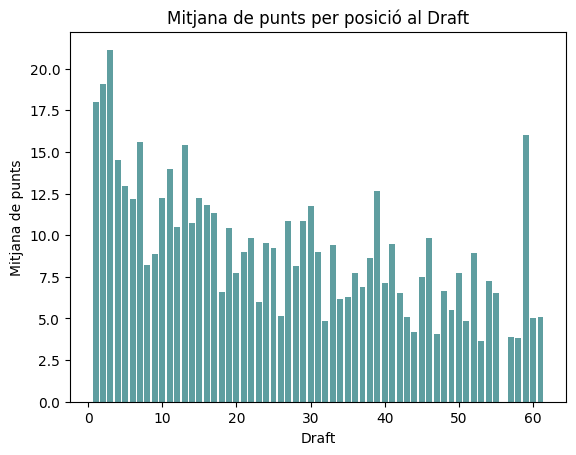

In [7]:
# Calculem la mitjana de punts per posició del draft
media_por_draft = nba_23.groupby('draft_number')['pts'].mean().reset_index()

# Creem un gràfic de columnes
plt.bar(media_por_draft['draft_number'], media_por_draft['pts'], color='cadetblue')

# Agreguem etiquetes i títol
plt.xlabel('Draft')
plt.ylabel('Mitjana de punts')
plt.title('Mitjana de punts per posició al Draft')

# Mostrem el gràfic
plt.show()

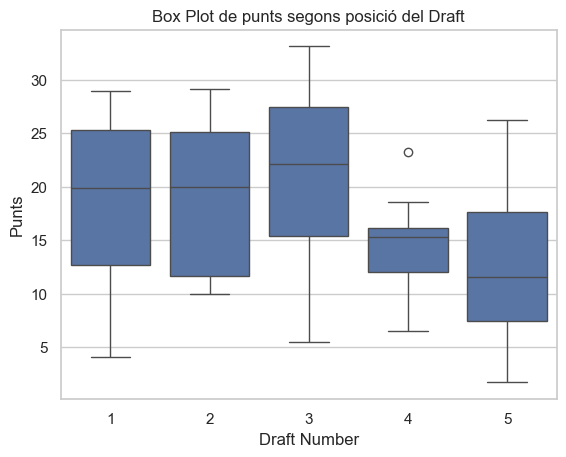

In [10]:
# Creem un box plot per a analitzar els punts realitzats pels jugadors triats
# a les 5 primeres posicions del draft durant la última temporada

sns.set(style="whitegrid")
sns.boxplot(x='draft_number', y='pts', data=top_players_nba_23)

# Afegim etiquetes i títol
plt.xlabel('Draft Number')
plt.ylabel('Punts')
plt.title('Box Plot de punts segons posició del Draft')

# Mostrem el gràfic
plt.show()

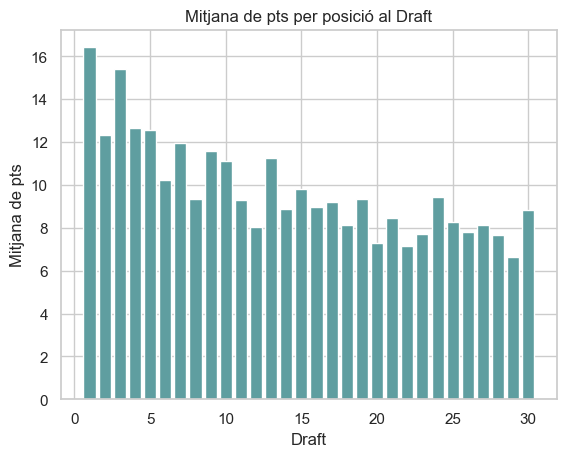

In [12]:
# No hem utilitzat aquest gràfic a l'entrega final

# Creem un dataset amb les primeres 30 posicions del fraft (1a ronda)
drafted1_30 = nba2[nba2['draft_number'].between(1, 30)]

# Calculem la mitjana de punts per posició del draft d'aquest subgrup
media_por_draft_1_30 = drafted1_30.groupby('draft_number')['pts'].mean().reset_index()

# Creem un gràfic de columnes
plt.bar(media_por_draft_1_30['draft_number'], media_por_draft_1_30['pts'], color='cadetblue')

# Agreguem etiquetes i títol
plt.xlabel('Draft')
plt.ylabel('Mitjana de pts')
plt.title('Mitjana de pts per posició al Draft')

# Mostrem el gràfic
plt.show()

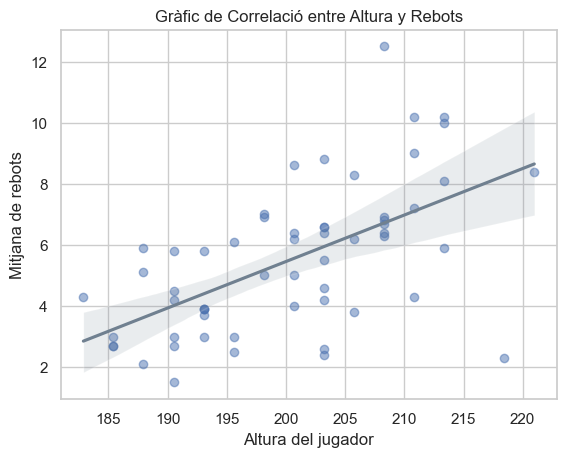

La correlació entre l'altura dels jugadors i la mitjana de rebots per partit és de 0.5849890016395867.


In [13]:
# Creem un gràfic de correlació amb seaborn utilitzant el dataset que conté les
# dades de l'última temporada dels jugadors draftejats entre les posicions 1 i 5
sns.set(style="whitegrid")
sns.regplot(x='player_height', y='reb', data=top_players_nba_23, scatter_kws={'alpha':0.5}, line_kws={'color':'slategrey'})

# Mostrem el gràfic amb el títol i eixos corresponents
plt.title('Gràfic de Correlació entre Altura y Rebots')
plt.xlabel('Altura del jugador')
plt.ylabel("Mitjana de rebots")
plt.show()

# Calculem també la correlació entre l'altura i els rebots
correlacion = top_players_nba_23['player_height'].corr(top_players_nba_23['reb'])
print(f"La correlació entre l'altura dels jugadors i la mitjana de rebots per partit és de {correlacion}.")

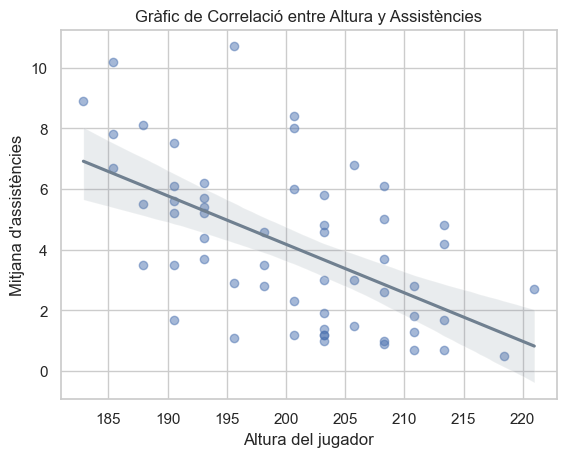

La correlació entre l'altura dels jugadors i la mitjana d'assistències per partit és de -0.5664231634354039.


In [14]:
# Creem un gràfic de correlació amb seaborn utilitzant el dataset que conté les
# dades de l'última temporada dels jugadors draftejats entre les posicions 1 i 5
sns.set(style="whitegrid")
sns.regplot(x='player_height', y='ast', data=top_players_nba_23, scatter_kws={'alpha':0.5}, line_kws={'color':'slategrey'})

# Mostrem el gràfic amb el títol i eixos corresponents
plt.title('Gràfic de Correlació entre Altura y Assistències')
plt.xlabel('Altura del jugador')
plt.ylabel("Mitjana d'assistències")
plt.show()

# Calculem també la correlació entre l'altura i les assistències
correlacion2 = top_players_nba_23['player_height'].corr(top_players_nba_23['ast'])
print(f"La correlació entre l'altura dels jugadors i la mitjana d'assistències per partit és de {correlacion2}.")

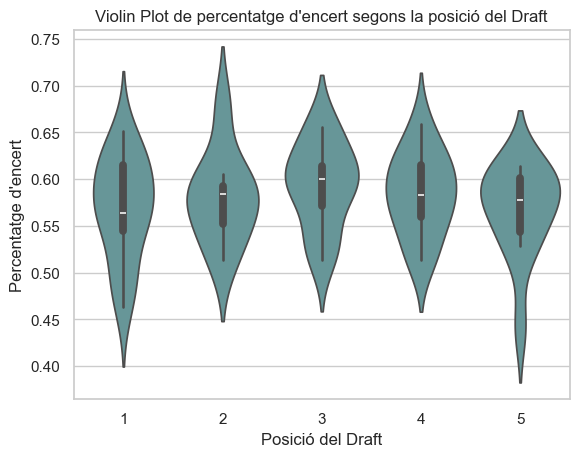

In [17]:
# Creem un violin plot del percentatge d'encert segons la posició del draft
sns.set(style="whitegrid")
sns.violinplot(x='draft_number', y='ts_pct', data=top_players_nba_23, color='cadetblue')

# Agreguem etiquetes i títol
plt.xlabel('Posició del Draft')
plt.ylabel("Percentatge d'encert")
plt.title("Violin Plot de percentatge d'encert segons la posició del Draft")

# Mostrem el gràfic
plt.show()

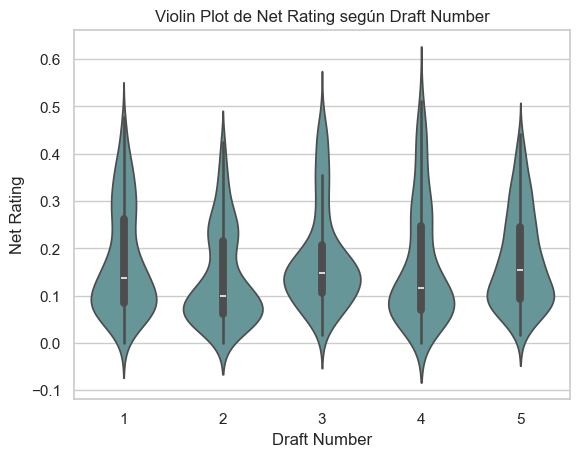

In [231]:
# Aquest gràfic no s'ha utilitzat a l'entregable final
# Creem un violin plot del percentatge del Net Rating segons la posició del draft
sns.set(style="whitegrid")
sns.violinplot(x='draft_number', y='ast_pct', data=top_players_nba, color='cadetblue')

# Agregar etiquetas y título
plt.xlabel('Draft Number')
plt.ylabel('Net Rating')
plt.title('Violin Plot de Net Rating según Draft Number')

# Mostrar el gráfico
plt.show()

In [19]:
# Creem un dataset netejant els valors incorrectes a 'draft_round'
nba_clean_rounds = nba
nba_clean_rounds['draft_round'].replace(to_replace=0, value='Undrafted', inplace=True)
nba_clean_rounds['draft_round'].replace(to_replace=4, value=2, inplace=True)

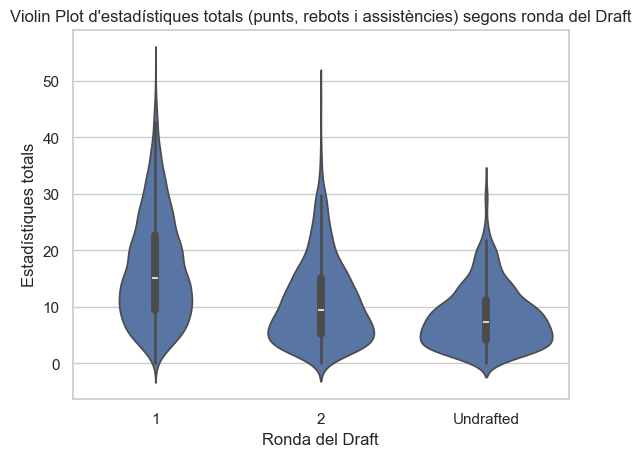

In [26]:
# Creem un agregat dels punts, rebots i assistències per a cada jugador
nba_clean_rounds['pts_reb_ast'] = nba_clean_rounds['pts'] + nba_clean_rounds['reb'] + nba_clean_rounds['ast']

# Aquest gràfic no s'ha utilitzat a l'entregable final
# Creem un violin plot de l'agregat d'estadístiques segons la ronda del draft
sns.set(style="whitegrid")
sns.violinplot(x='draft_round', y='pts_reb_ast', data=nba_clean_rounds)

# Agreguem etiquetes i títol
plt.xlabel('Ronda del Draft')
plt.ylabel('Estadístiques totals')
plt.title("Violin Plot d'estadístiques totals (punts, rebots i assistències) segons ronda del Draft")

# Mostrem el gràfic
plt.show()

C:\Users\marcm\AppData\Local\Temp\ipykernel_4264\3087704038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_players_nba['pts_reb_ast'] = top_players_nba['pts'] + top_players_nba['reb'] + top_players_nba['ast']


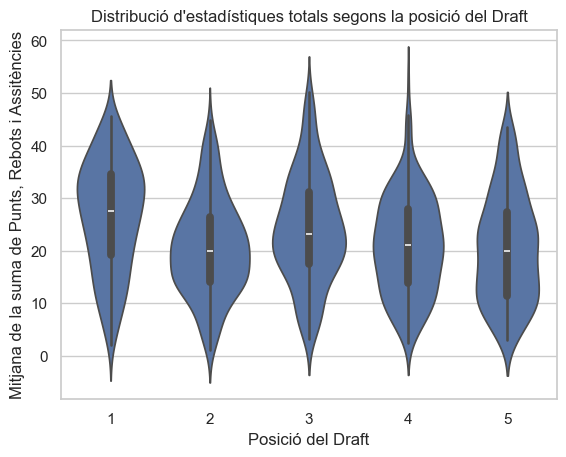

In [28]:
# Creem el mateix agregat per al dataset que conté la informació dels jugadors
# triats en les 5 primeres posicions del Draft
top_players_nba['pts_reb_ast'] = top_players_nba['pts'] + top_players_nba['reb'] + top_players_nba['ast']

# Creem un violin plot per a veure la performance dels jugadors triats en les 5 
# primeres posicions del draft en quant a l'agregat d'estadístiques principals.
# Aquestes són punts, rebots i assitències
sns.set(style="whitegrid")
sns.violinplot(x='draft_number', y='pts_reb_ast', data=top_players_nba)

# Agreguem etiquetes i títol
plt.xlabel('Posició del Draft')
plt.ylabel('Mitjana de la suma de Punts, Rebots i Assitències')
plt.title("Distribució d'estadístiques totals segons la posició del Draft")

# Mostrem el gràfic
plt.show()